## **Car Brand Classification Using Transfer Learning Resnet50**

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Datasets/Train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Dataset/Datasets/Test'


In [ ]:
# Importing Resnet50 library 
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


94773248/94765736 [==============================] - 0s 0us/step


In [ ]:
# Not training the existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# getting number of output classes using glob
folders = glob('/content/drive/MyDrive/Colab Notebooks/Dataset/Datasets/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# creating model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# viewing the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
# cost and optimization method for model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Using the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Providing same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Dataset/Datasets/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [ ]:
# fiting the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 40s 23s/step - loss: 3.9148 - accuracy: 0.2917 - val_loss: 11.9026 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 19s 14s/step - loss: 10.3124 - accuracy: 0.4062 - val_loss: 2.5281 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 19s 14s/step - loss: 2.4167 - accuracy: 0.3958 - val_loss: 4.8105 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 19s 13s/step - loss: 5.2487 - accuracy: 0.3229 - val_loss: 2.7080 - val_accuracy: 0.4310
Epoch 5/50
2/2 [==============================] - 19s 13s/step - loss: 2.2449 - accuracy: 0.5417 - val_loss: 3.3988 - val_accuracy: 0.3276
Epoch 6/50
2/2 [==============================] - 19s 14s/step - loss: 2.6381 - accuracy: 0.3958 - val_loss: 2.4917 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 19s 14s/step - loss: 1.6306 - accuracy: 0.4583 - val_loss: 1.8461 - val_accuracy: 0.5000
Epoch 8/50
2/2 [=========

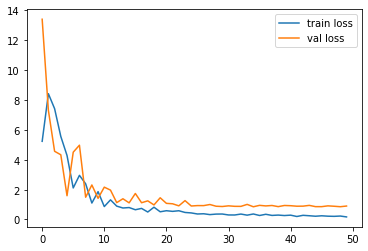

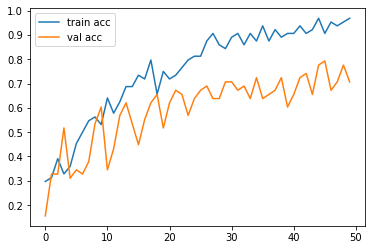

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')


In [67]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/Dataset/Datasets')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[3.7503935e-02, 4.6586087e-01, 4.9663517e-01],
       [7.4964962e-03, 2.4114071e-01, 7.5136280e-01],
       [8.0232985e-02, 5.4261591e-02, 8.6550540e-01],
       [4.2416952e-03, 1.9113159e-02, 9.7664511e-01],
       [5.2772402e-03, 3.2959172e-01, 6.6513103e-01],
       [3.1738568e-02, 1.9831980e-04, 9.6806318e-01],
       [2.1711141e-01, 5.6289929e-01, 2.1998930e-01],
       [2.4518484e-02, 1.7447634e-01, 8.0100518e-01],
       [7.2476089e-02, 8.8701677e-01, 4.0507175e-02],
       [1.2801285e-02, 8.9765161e-01, 8.9547083e-02],
       [2.2799922e-02, 9.0247750e-01, 7.4722640e-02],
       [1.6168034e-01, 2.1392889e-01, 6.2439078e-01],
       [4.0854757e-06, 1.0880948e-03, 9.9890780e-01],
       [2.0039266e-02, 4.6395555e-01, 5.1600516e-01],
       [2.5641438e-01, 3.8449210e-01, 3.5909355e-01],
       [2.6016855e-03, 8.8812625e-01, 1.0927207e-01],
       [2.2414459e-02, 9.7466022e-01, 2.9252663e-03],
       [4.3704066e-02, 7.9113163e-02, 8.7718284e-01],
       [7.5486451e-02, 3.591

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0, 2,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 0,
       1, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Colab Notebooks/Dataset/Datasets/Test/audi/25.jpg',target_size=(224,224))


In [ ]:
x=image.img_to_array(img)
x

array([[[137., 160., 144.],
        [139., 156., 146.],
        [142., 155., 148.],
        ...,
        [174., 152., 111.],
        [179., 158., 115.],
        [141., 120.,  75.]],

       [[141., 159., 143.],
        [144., 157., 147.],
        [144., 155., 147.],
        ...,
        [165., 143., 102.],
        [171., 150., 107.],
        [135., 114.,  69.]],

       [[141., 159., 143.],
        [144., 157., 147.],
        [144., 155., 147.],
        ...,
        [165., 143., 102.],
        [171., 150., 107.],
        [135., 114.,  69.]],

       ...,

       [[107., 119., 133.],
        [105., 117., 131.],
        [107., 119., 133.],
        ...,
        [168., 177., 186.],
        [167., 176., 185.],
        [162., 171., 180.]],

       [[107., 119., 133.],
        [105., 117., 131.],
        [107., 119., 133.],
        ...,
        [168., 177., 186.],
        [167., 176., 185.],
        [162., 171., 180.]],

       [[126., 138., 152.],
        [133., 145., 159.],
        [126., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.03328564, 0.00530089, 0.96141344]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a==1

array([False])